# Convolutional Neural Networks Show Attention-like Effects When Performing Visual Search Tasks

## Abstract
Convolutional neural networks (CNNs) provide cutting edge tools for computer vision tasks like image classification and scene segmentation. However, they suffer from known flaws. Many mechanisms proposed to improve the performance of neural networks have been given the name "attention" [@xuShowAttendTell2015]. This may be surpising to scientists studying the visual system, who have traditionally thought of attention as an artifact of the limited resources available for processing sensory inputs. Attention in the brain has been primarily investiaged using visual search tasks. These tasks may provide an alternate way of benchmarking existing neural network architectures, comparing their output with human behavior, and measuring how any proposed attentional mechanisms change neural network outputs. We are pursuing these alternate benchmarks for attentional mechanisms in the course of our investigations of continual learning algorithms. Here we adapt a classic form of visual search task so it can be performed by neural networks. We measure the accuracy of two CNN architectures, AlexNet and VGG16, as they report whether a target is present among distractors. These architectures were chosen in part because they have been used in several studies that report similarities between activations in the hidden layers of the network and activity in the visual system of the brain, when both are presented with the same images. Surprisingly, we find that both AlexNet and VGG16 show attention-like effects when performing the task. When the target resembles the distractors, then a network's accuracy drops as the number of distractors increases. These dependency of accuracy on the number of items is often referred to as "set size effects". We do not find that these set size effects can be explained by known factors to affect CNNs, such as edge effects. It might seem obvious that target-distractor similarity would impair accuracy, but much of the visual attention literature boils down to a debate about the extent to which these effects can be attributed to cognitive processes, e.g. whether those processes are serial or parallel and noisy. Here, since we know that CNNs process their inputs in parallel, we can conclusively attribute the impaired accuracy here to target-distractor similarity. Therefore, we suggest that any mechanism which can be reformulated as a learned weighting processed in parallel is not categorically different from current CNNs. Such mechanisms may not ever improve performance of CNNs, given that the attentional effects they produce will be of the the kind we describe here.

## Introduction
### Visual search tasks for investigating attention
In the "classical" form of the visual search paradigm [@wolfeVisualSearch1998], experimenters present a subject with a search display on which there are discrete items, i.e. objects. The subject is asked to report whether a target is present among distractors. The experimenter sets the probability that the target will be present on any given trial. Experimenters measure the reaction time and/or accuracy of the subjects. Often, the results are presented as a plot of reaction time as a function of set size (the number of discrete items in stimulus). By fitting a line to the plot of reaction times as a function of set size and taking the slope of that line, experimenters produced estimates of processing speed, i.e. "seconds per item". Slopes are almost horizontal when subjects are shown visual search stimuli where targets differ from distractors in some clearly salient **feature**, e.g. a red target among green distractors, and slopes become much steeper when targets differ from distractors in some harder-to-distinguish **spatial conjunction** of features, e.g., a digital 2 among digital 5s. Some examples of these stimuli are shown below, generated with https://github.com/NickleDave/searchstims.

<table><tr>
<td> <img src="../static/redvert_v_greenvert_set_size_4_target_present_55.png" alt="efficient" style="width: 250px;"/> </td>
<td> <img src="../static/two_v_five_set_size_6_target_present_78.png" alt="inefficient" style="width: 250px;"/> </td>
</tr>
<tr>
<td> <b>Feature</b> search $\longrightarrow$ almost horizontal slopes </td>
<td> <b>Spatial configuration</b> search $\longrightarrow$ steep slopes </td>
</tr>
</table>

Below is a figure explaining the basic visual search paradigm, reproduced from [Wolfe Horowitz 2017](http://search.bwh.harvard.edu/new/pubs/FiveFactors_Wolfe-Horowitz_2017.pdf)

<img src="../static/Fig-2-Wolfe-Horowitz-2017.png" alt="inefficient" style="width: 900px;"/>

This use of search slope as metric led to one of the most influential early models of visual search: feature integration theory [@treismanFeatureintegrationAttention1980]. Essentially, feature integration theory posits that the brain can search the visual field in parallel when a single feature distinguishes the target from distractors, but that a conjunction of multiple features requires serial processing. However, Wolfe [@wolfeWhatCanMillion1998] showed that there is no clear cut segregation of slopes into one type or the other, and that in fact the distributions of slope overlap so much it is not possible to distinguish them. He has proposed talking about visual search in terms of a spectrum of of speeds that depend in some way on features: when a salient feature like color is what discriminates the target from the distractor, this allows for efficient search, like in the visual search stimulus on the left. When a complex conjunction of features distinguishes the target from the distractor, as in the visual search stimulus on the right, this results in inefficient search. In the results below, however, we continue to refer to the stimuli by the names "feature" and "spatial conjunction" search.

### Accuracy as a measure of attentional effects
Although these classic visual search tasks were originally designed to answer questions about how features were processed across the visual field, they went on to became the basis for most modern theories of selective visual attention. As described above, the feature integration theory (FIT) held that some features could be processed in parallel, in a pre-attentional way, but a conjunction of features required directing attention to it, and that items consisting of such features were processed in a serial way. Given this theory about the algorithms underlying attention, reaction times become a proxy for attention; they are what we measure to see if our theories about attention are correct.  
The approach of measuring reaction times is not always used. In some cases, the stimulus is shown only briefly to the subject, and then after a variable length of time a masking stimulus such as white noise is shown. During the period between the stimulus with a set of items and the masking stimulus, the "*internal representation* of that stimulus can be searched \[by the subject\] until a mask appears several hundred milliseconds later" [@wolfeVisualSearch1998] (emphasis added). When the experiment is carried out this way, accuracy is measured instead of reaction time [@bergenRapidDiscriminationVisual1983; @ecksteinLowerVisualSearch1998]. Accuracy has an inverse linear relationship with set size in these experiments (as opposed to the linear relationship seen between reaction times and set size). In spite of this change, when accuracy is used as the measure, it fulfills the same function as reaction times: we use accuracy to tell us whether attentional processes behaves as we think they do. **But of course CNNs have no built-in mechanism of attention; in effect, they process the entire visual field in parallel, in a single pass, instantaneously**. Therefore, if we see attention-like effects when measuring the accuracy of CNNs, we must either conclude either one of two things: (1) we have not chosen a task and/or metric that gives us insight into the processing going on. Maybe a single scalar metric like accuracy is not actually telling us much about the behavior used to achieve the task, or the internal process of the algorithm that is performing the task. Or (2) we have chosen a good task and/or metric, but there's some other explanation that doesn't require attention, because an algorithm without attention can produce the same behavior that we produce. Maybe attention-like effects are just what happens when brains and CNNs solve this task, because targets are hard to discriminate from distractors, regardless of the features.

## Results
In an initial set of simulations, we trained a CNN to "perform" the visual search task. We used the AlexNet architecture, which has previously been used in studies comparing CNNs to the visual system [@khaligh-razaviDeepSupervisedNot2014]. To train AlexNet, we followed a fine-tuning approach, where we re-used weights from training this CNN on the ImageNet dataset. During fine-tuning, the weights in the convolutional layers were frozen, but randomly initialized weights in the final fully-connected layers were update with a very small learning rate. The original softmax layer with 1000 outputs representing ImageNet classes was replaced with a 2-unit softmax layer, where one unit represented a response of "target present" and the other a response of "target absent". This approach is similar to that taken by a previous study [@poderCapacityLimitationsVisual2017]; we discuss differences in the details of fine-tuning in the methods below. To generate visual search stimuli that could be fed into a neural network, we used a simple Python package (<https://github.com/NickleDave/searchstims>) built on top of the [PyGame](https://www.pygame.org) library . The search displays were divided up into a 5x5 grid of cells, and items were plotted in a randomly chosen subset of cells (as described in <cite data-cite="6027200/QCQFYFDZ"></cite> and shown at <http://search.bwh.harvard.edu/new/data_set_files.html>). The library applied jitter to the items, so that two images could be different even if both images had the same set size and target present condition, and the items were in the exact same cells.  This is typically done with visual search stimuli used in psychophysics experiments, but an added benefit was that this allowed us to create a large set of unique training images (on the order of ten thousand) for each set size and condition, in effect resulting in a sort of data augmentation, as is often used when training neural networks.

### AlexNet shows attentional effects without any attention mechanisms in spite of processing images in parallel
After training AlexNet to perform this task, we found to our surprise that the results qualitatively resemble those seen for human subjects. We plotted accuracy as a function of set size, and saw that slopes of these lines were close to horizontal when AlexNet performed the task given feature search stimuli, where the target was a red vertical rectangle among distractors that were green vertical rectangles. In contrast, the slopes were steep when AlexNet performed the task given spatial conjunction search stimuli, where the target was a digital 2 and the distractors were digital 5s.

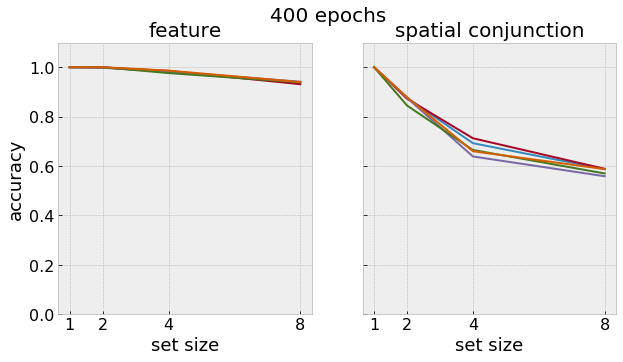

In [1]:
%matplotlib inline
import os

from searchnets.plots.figures import ftr_v_spt_conj, mn_slope_by_epoch

TEST_RESULTS_DIR = '../../data/experiment_1/results'
eff_400_results = os.path.join(TEST_RESULTS_DIR,
                            'config_efficient_400_epochs_models/test_alexnet_output.gz')
ineff_400_results = os.path.join(TEST_RESULTS_DIR,
                             'config_inefficient_400_epochs_models/test_alexnet_output.gz')

ftr_v_spt_conj(eff_400_results,
               ineff_400_results,
               epochs=400)

**Figure 1. Accuracy of AlexNet when reporting whether a target is present or absent, given efficient or inefficent visual search stimuli** X axis is set size, i.e., number of items in the visual search stimulus shown to the network. Y axis is mean accuracy for each set size, as measured on a previously unseen test set. The test set contained ~3000 images, balanced so that there were equal numbers of images for each set size.  Each line represents one trained network; there are five replicates total.

### Higher accuracy correlates with stronger attentional effects
Given the surprising result that CNNs showed attention-like effects without attention mechanisms and in spite of processing their inputs in a parallel, feedforward fashion, we next asked whether these effects might depend on training. Again to our surprise, we saw that slopes for the feature search got closer to zero as we increased the number of epochs of training, while the slopes for spatial conjunction search got steeper. This was in spite of the fact that training accuracy continued to increase up until about 800 epochs, as measured on a validation set. 

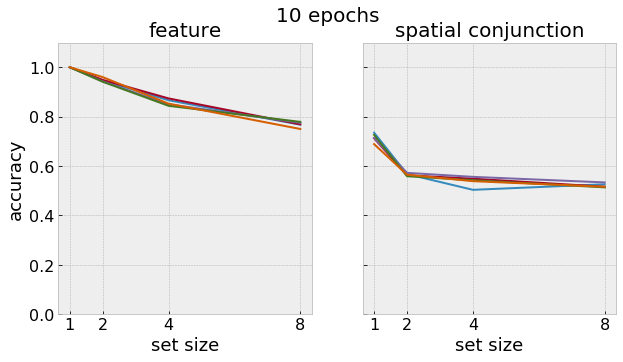

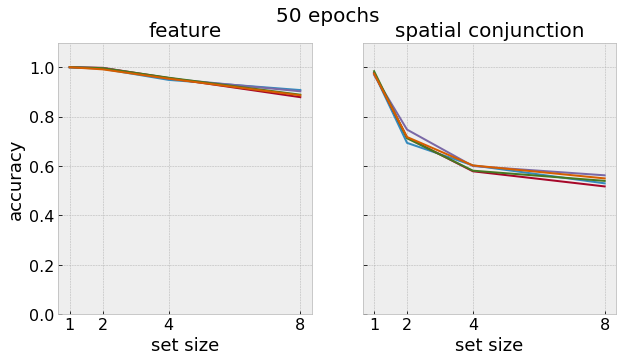

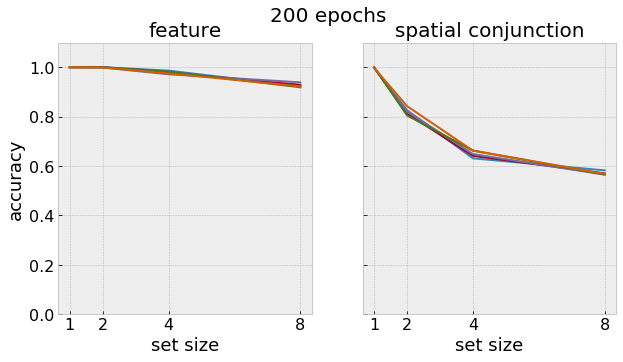

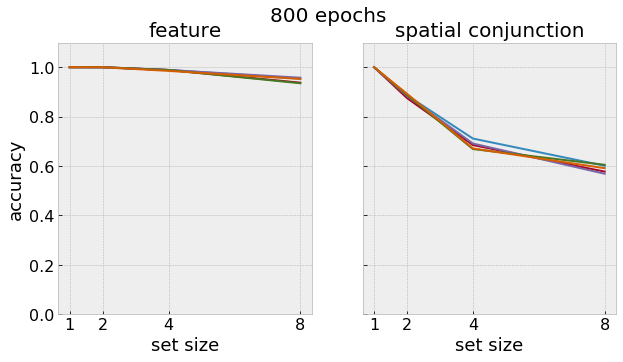

In [2]:
TEST_RESULTS_DIR = '../../data/experiment_2/results'
epochs_list = [10, 50, 200, 800]
eff_results_list = []
ineff_results_list = []
for epochs in epochs_list:
    eff_results = os.path.join(TEST_RESULTS_DIR, f'config_efficient_{epochs}_epochs_models/test_alexnet_output.gz')
    eff_results_list.append(eff_results)
    ineff_results = os.path.join(TEST_RESULTS_DIR, f'config_inefficient_{epochs}_epochs_models/test_alexnet_output.gz')
    ineff_results_list.append(ineff_results)
    ftr_v_spt_conj(eff_results,
                   ineff_results,
                   epochs=epochs)

To quantify this result, we fit slopes to the accuracy vs. set size plots for each trained replicate of AlexNet, for each number of training epochs. As shown below, the slope for feature search decreased as the number of training epochs increased, while the slpe for spatial conjunction search increased. We took the mean slope for each type of search stimulus and subtracted them to get a measure of the difference, and saw that indeed this difference did increase as the number of training epochs increased.

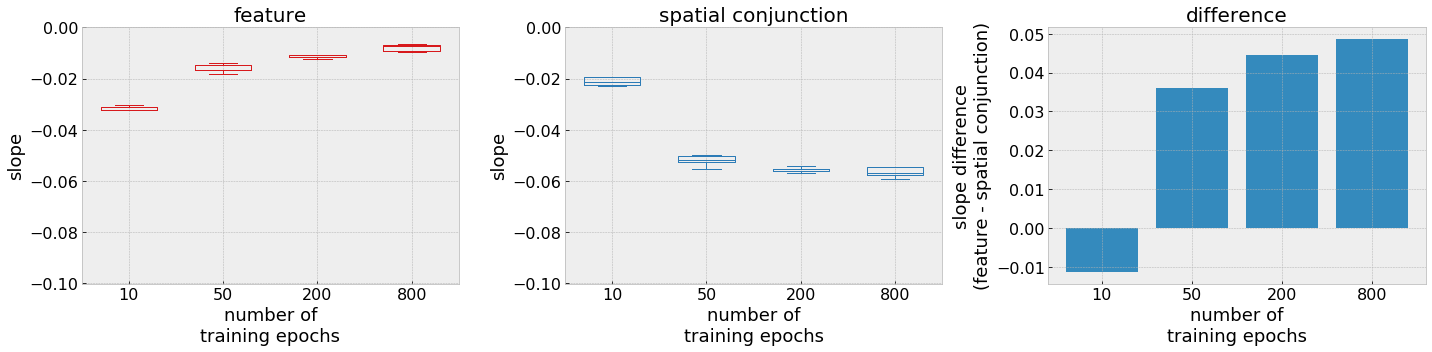

In [3]:
mn_slope_by_epoch(eff_results_list, ineff_results_list, epochs_list)

## Methods
Alexnet training:  
• based on Poder 2017  
https://arxiv.org/pdf/1707.09775.pdf
• Stochastic gradient descent  
• Learning rate for fully-connected layers: 1e-20  
• 10 epochs (as in Poder 2017), and 400 epochs  

## References

## Acknowledgments